In [1]:
import pandas as pd

moist = pd.read_csv('/home/pi/irrigation/test.csv')
# moist = pd.read_csv('test.csv')

In [2]:
moist.columns = ["Timetemp", "Temp", "Humidity"]
# moist

In [3]:
moist['Time'] = pd.to_datetime(moist["Timetemp"])
moist = moist.drop(columns='Timetemp')
moist.dtypes

Temp               float64
Humidity           float64
Time        datetime64[ns]
dtype: object

In [4]:
# moist['Time'].head()


In [5]:
moist = moist.set_index('Time')
# moist.head()


In [6]:
moist['Week']=moist.index.weekofyear
# moist['freq']=moist.index.freq
moist.tail()

,Temp,Humidity,Week
Time,,,
2019-06-01 22:39:12,14.6250,29.8697,22
2019-06-01 22:40:13,14.5625,29.8657,22
2019-06-01 22:41:14,14.4688,29.8598,22
2019-06-01 22:42:14,14.4062,29.8559,22
2019-06-01 22:43:15,14.3125,30.2637,22


In [7]:
# import matplotlib.pyplot as plt

# moist['Humidity'].plot()

In [8]:
moist['2019-06-01 14:00':].Humidity.plot(legend=True)
moist['2019-06-01 14:00':].Temp.plot(secondary_y=True,label='Temp',legend=True)

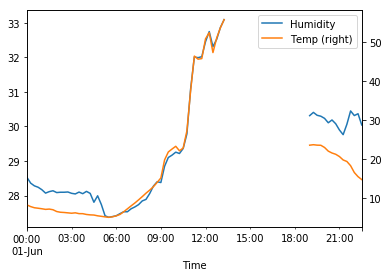

In [9]:
hourly = moist.resample('15Min').mean()
hourly['2019-06':].Humidity.plot(legend=True)
hourly['2019-06':].Temp.plot(secondary_y=True,legend=True)


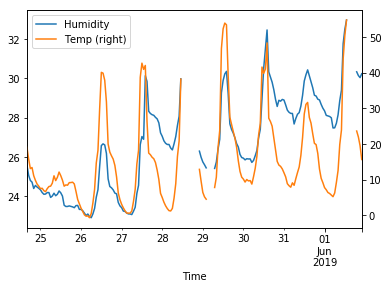

In [11]:
hourly = moist.resample('1H').mean()
hourly['2019-04':].Humidity.plot(legend=True)
hourly['2019-04':].Temp.plot(secondary_y=True,legend=True)